In [3]:
import sys
import skimage
from skimage import data, feature, filters, color, img_as_float
from scipy import misc
from skimage.filters import threshold_yen
from skimage.filters import threshold_otsu
from matplotlib import pyplot as plt
from matplotlib import cm
from skimage.morphology import skeletonize
from skimage.feature import canny
import numpy as np
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage import io
from skimage import img_as_uint
import glob
from PIL import Image
from skimage import io
import imageio

###########
##########INPUT AGUMENTS############
##DON'T FORGET TO UPDATE PATH
##INPUT IN THE COMMEND LINE s1 and s2 (i usually do 3 and 5 respectively)
path = "/Users/poojasuresh/Documents/iPQB/DumontLab/image_processing/test_skeletonize/houghtransforms/20171215_4"

image_list = []
for filename in glob.glob('%s/testavg_*.tif'%path): #assuming gif
    image_list.append(filename)

#print image_list

for name in image_list:
    index = name.lstrip('%s/test'%path).rstrip('.tif')
    print index


####READ IMAGE, COMMAND LINE PROMPT####
    img = misc.imread(name)


###DIFFERENCE OF GAUSSIAN FILTER###
    s1 = filters.gaussian(img,3)
    s2 = filters.gaussian(img,5)

    dog = s1 - s2

###THRESHOLD YEN###
    global_thresh = threshold_otsu(dog)
    binary_global = dog > global_thresh

###SKELETON###
    skeleton = skeletonize(binary_global)

###HOUGH LINE TRANSFORM###
    lines = probabilistic_hough_line(skeleton, threshold=10, line_length=3,
                                     line_gap=10)

vg_0
vg_1
vg_2
vg_3
vg_4
vg_5
vg_6
vg_7
vg_8
vg_9


In [8]:
binary_global*1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
skeleton

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [11]:
imageio.imwrite('%s/img.tif'%path,img)
imageio.imwrite('%s/DoG.tif'%path,dog)
imageio.imwrite('%s/threshold.tif'%path,binary_global*1)
imageio.imwrite('%s/skeleton.tif'%path,skeleton*1)

In [12]:
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches
from skimage.color import label2rgb
import matplotlib.pyplot as plt
from matplotlib import cm


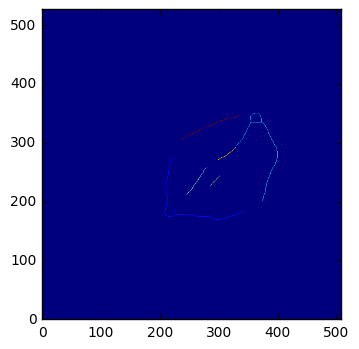

In [146]:
label_image = label(skeleton*1)
plt.imshow(label_image)
plt.gca().invert_yaxis()
plt.show()


In [147]:
regions = regionprops(label_image)
print regions

[<skimage.measure._regionprops._RegionProperties object at 0x113ec5650>, <skimage.measure._regionprops._RegionProperties object at 0x113ec56d0>, <skimage.measure._regionprops._RegionProperties object at 0x115c9ead0>, <skimage.measure._regionprops._RegionProperties object at 0x11545ddd0>, <skimage.measure._regionprops._RegionProperties object at 0x11545d8d0>, <skimage.measure._regionprops._RegionProperties object at 0x11545d9d0>, <skimage.measure._regionprops._RegionProperties object at 0x11545df90>]


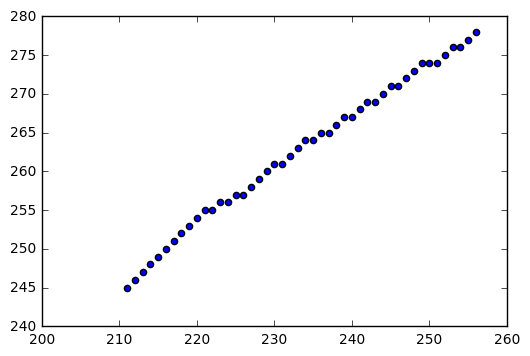

In [148]:
region = regions[2].coords
#print type(region)
x, y = region.T
plt.scatter(x,y)
plt.show()
#print y
#print region

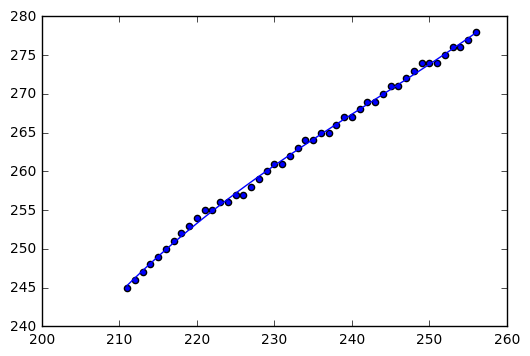

In [149]:
fit = np.polyfit(x,y,3)
val = np.polyval(fit, x)
plt.scatter(x,y)
plt.plot(x,val)
plt.show()

In [151]:
'''mydict={}

for i in region:
    mydict[i[1]] = [i[0]]
#    print mydict
    if i[1] in mydict.keys():
        mydict[i[1]].append(i[0])  

#print mydict'''

In [152]:
'''print type(mydict)
for key in mydict.keys():
    for i in region:
        if i[0] == key:
            mydict[i[0]].np.append(i[1])'''

'print type(mydict)\nfor key in mydict.keys():\n    for i in region:\n        if i[0] == key:\n            mydict[i[0]].np.append(i[1])'